In [3]:
import os, sys
project_dir = os.path.join(os.getcwd(),'..')
if project_dir not in sys.path:
    sys.path.append(project_dir)

attention_dir = os.path.join(project_dir, 'modules/AttentionMap')
if attention_dir not in sys.path:
    sys.path.append(attention_dir)

sparse_dir = os.path.join(project_dir, 'modules/Sparse')
if sparse_dir not in sys.path:
    sys.path.append(sparse_dir) 

In [4]:
from AttentionMap.LocalAttention import CoordinateAttentionBlock, CoordAttentionConv

# test = CoordinateAttentionBlock(3, 16, 4)
model = CoordAttentionConv(3, 8, 8)

In [5]:
model

CoordAttentionConv(
  (conv): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (att_block): CoordinateAttentionBlock(
    (emb): CoordinateInformationEmbeding(
      (pool_h): AdaptiveAvgPool2d(output_size=(None, 1))
      (pool_w): AdaptiveAvgPool2d(output_size=(1, None))
      (emb): Sequential(
        (0): Conv2d(8, 4, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
      )
    )
    (att_h): Sequential(
      (0): Conv2d(4, 8, kernel_size=(1, 1), stride=(1, 1))
      (1): Sigmoid()
    )
    (att_w): Sequential(
      (0): Conv2d(4, 8, kernel_size=(1, 1), stride=(1, 1))
      (1): Sigmoid()
    )
  )
)

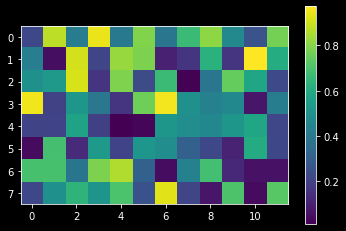

In [6]:
import torch
from matplotlib import pyplot as plt
a = torch.rand(1,3,8,12)
N,C,H,W = a.size()
plt.imshow(a[0,0])
plt.colorbar()
plt.show()

In [ ]:
result = model(a).detach()

plt.figure(figsize=(16,4))
for i in range(result.size(1)):
    plt.subplot(2,result.size(1)//2,i+1)
    plt.imshow(result[0,i])
    plt.colorbar()

plt.show()

In [7]:
dataset_dir = os.path.join(project_dir, 'derma/dataset')
if dataset_dir not in sys.path:
    sys.path.append(dataset_dir) 

In [15]:
from derma.dataset import Derma
import config
dataset = Derma(config.DATASET_DIR)

In [ ]:
from torchvision.datasets import MNIST
dataset = MNIST('data/', download=True)

In [ ]:
dataset_dir = os.path.join(config.DATASET_DIR, 'pepe')

In [ ]:
from torchvision.transforms import Compose, ToTensor, Normalize, RandomRotation
transform = Compose([
    ToTensor(),
    Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]), 
    RandomRotation(10, )
])
test = Derma('asd', transform)
x, y = test[0]
# x

In [ ]:
x.shape

In [ ]:
x.max()

In [ ]:
x.min()